# k-means stuff

In [1]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

## data retrieval

In [2]:
mnist = scipy.io.loadmat("data/mnist_train.mat")

use = 10 ** 4
digits: np.ndarray = mnist["digits"].T[:use]

## initial clusters

In [3]:
k = 20
assign = np.random.randint(0, k, (use,))

reps = []
for i in range(k):
    chosen = digits[assign == i, :]
    reps.append(chosen.mean(axis=0))
reps = np.array(reps)

## actual algo

In [4]:
last_cost = float("inf")
while True:
    cost = 0
    for v, img in enumerate(digits):
        dists = np.linalg.norm(img - reps, axis=1)
        assign[v] = dists.argmin()
        cost += dists[assign[v]]
    
    for i in range(k):
        chosen = digits[assign == i, :]
        reps[i] = chosen.mean(axis=0)

    if np.abs(cost - last_cost) <= 1e-5 * cost:
        break
    last_cost = cost

# displaying results

/tmp/ipykernel_19243/3829264537.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


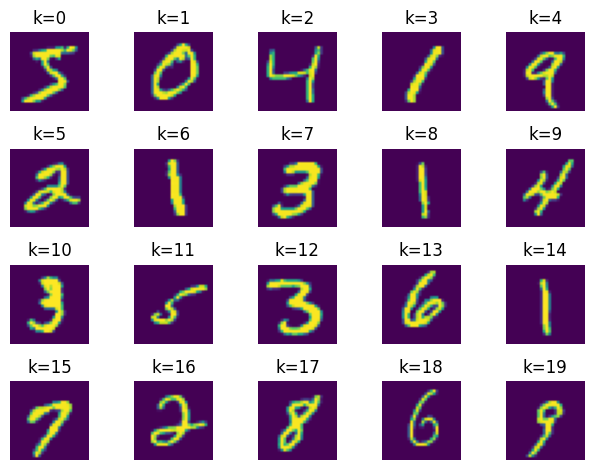

In [5]:
fig, ax = plt.subplots(4, 5)

flat_ax = ax.flatten()
for i in range(k):
    flat_ax[i].imshow(digits[i].reshape(28, 28).T)
    flat_ax[i].set_axis_off()
    flat_ax[i].set_title(f"k={i}")

fig.tight_layout()
fig.show()